In [3]:
#import packaging
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [5]:
#upload DataSets
(X_train, y_train), (X_test, y_test)= cifar10.load_data()

170508288/170498071 [==============================] - 289s 2us/step


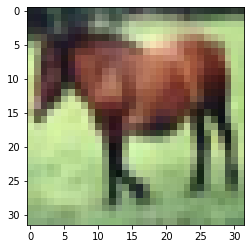

In [8]:
plt.imshow(X_train[7])

In [10]:
X_train=X_train/255
X_test=X_test/255

In [13]:
#create model keras.Sequential
model=Sequential()

In [14]:
#create  Convolutional neural network
model.add(Conv2D(256,(3,3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Flatten())

In [18]:
#full connected
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 activation (Activation)     (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3686464   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [24]:
#train the model
model.fit(X_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 264s 169ms/step - loss: 2.3044 - sparse_categorical_accuracy: 0.0996
Epoch 2/2
1563/1563 [==============================] - 222s 142ms/step - loss: 2.3032 - sparse_categorical_accuracy: 0.0991


In [26]:
test_loss, test_accuracy=model.evaluate(X_test, y_test)

313/313 [==============================] - 12s 40ms/step - loss: 2.3029 - sparse_categorical_accuracy: 0.1000
